# Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
# Define X values
x = np.array([2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8])

In [ ]:
# Define Y values
y = np.array([21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86])

## Manual Regression

In [ ]:
M = 10 # Play around with these values
C = 1

In [ ]:
# Create an array of X values from 1 to 10
x1 = np.linspace(1,10,6)
y1 = M * x1 + C

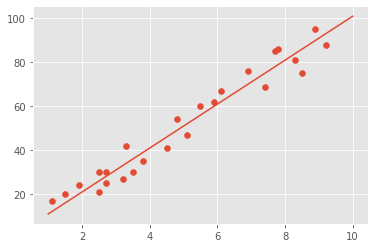

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.plot(x1, y1)
plt.show()

## Using linear regression

In [ ]:
# Scikit learn's linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [ ]:
# A model limitation
x_lr = x.reshape(-1,1)
y_lr = y.reshape(-1,1)

In [ ]:
# Fit the linear regression model
linreg.fit(x_lr, y_lr)

LinearRegression()

In [ ]:
# Get the fitted model's constant values
M = linreg.coef_[0][0]
C = linreg.intercept_[0]

In [ ]:
x1 = np.linspace(1,10,6)
y1 = M * x1 + C

In [ ]:
print(M, C)

9.775803390787468 2.48367340537321


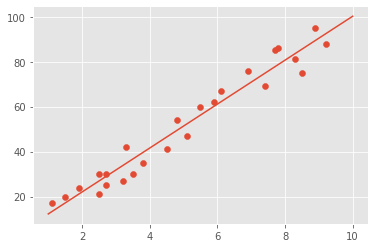

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.plot(x1, y1)
plt.show()

# Autoregression

Predict X[t+1] given X[t-1] and X[t-2]

Dataset used: https://github.com/urgedata/pythondata/blob/master/examples/retail_sales.csv

In [ ]:
# Get datset of retail sales
!wget https://raw.githubusercontent.com/urgedata/pythondata/master/examples/retail_sales.csv -O rs.csv

--2022-09-17 11:29:44--  https://raw.githubusercontent.com/urgedata/pythondata/master/examples/retail_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1307 (1.3K) [text/plain]
Saving to: ‘rs.csv’

rs.csv              100%[===================>]   1.28K  --.-KB/s    in 0s      

2022-09-17 11:29:44 (86.7 MB/s) - ‘rs.csv’ saved [1307/1307]



In [ ]:
# Read the csv data
rs_df = pd.read_csv("rs.csv")

In [ ]:
rs_df.head()

,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


In [ ]:
rs_df['date'] = pd.to_datetime(rs_df['date']) # Make it ordered
rs_df['date'] = pd.DatetimeIndex(rs_df['date']) 
rs_df.set_index(rs_df['date'], inplace=True) # Convert the datetime index
rs_df.drop(columns='date', inplace=True) # Drop the date column

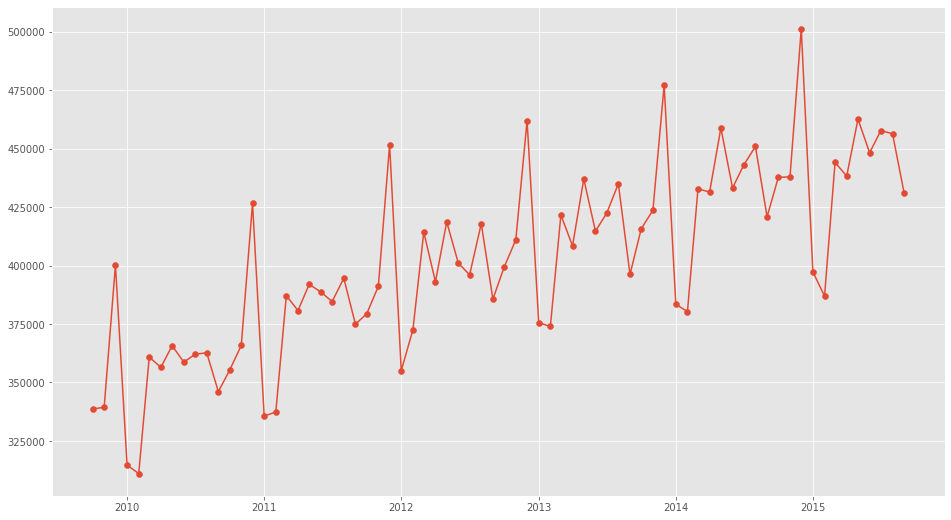

In [ ]:
# Plot the scatterplot as well as line plots
plt.figure(figsize=(16,9))
plt.scatter(x=rs_df.index, y=rs_df['sales'])
plt.plot(rs_df.index, rs_df['sales'])
plt.show()

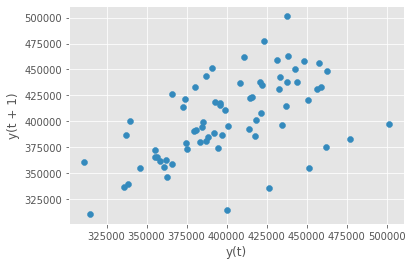

In [ ]:
# Lag plot
pd.plotting.lag_plot(rs_df['sales'])

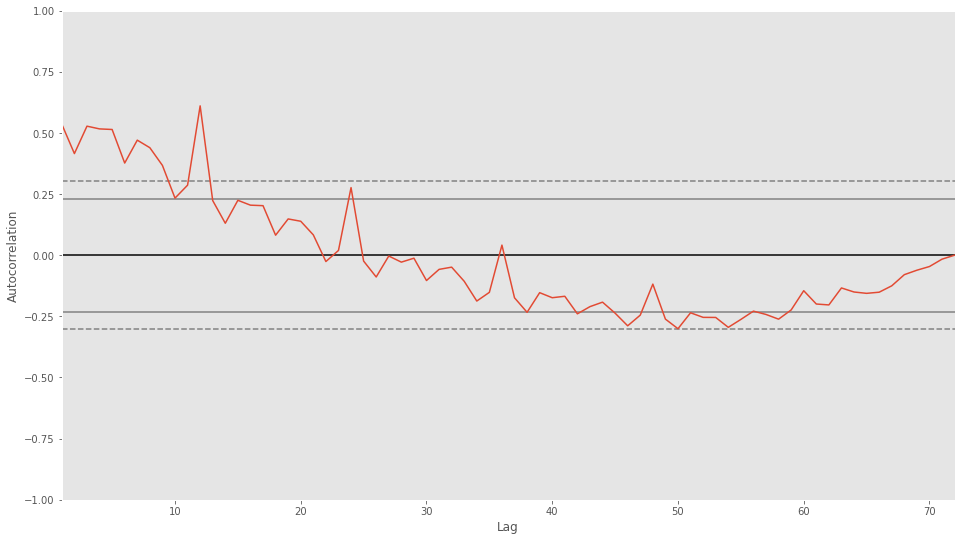

In [ ]:
# Plot autocorrelation of y(t) with y(t-LAG)
plt.figure(figsize=(16,9))
pd.plotting.autocorrelation_plot(rs_df['sales']) # Show confidence levels

In [ ]:
# Alternative autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

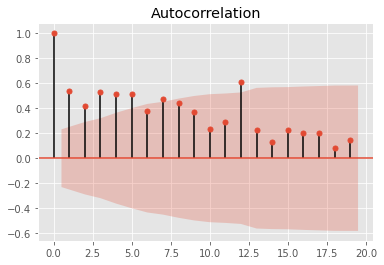

In [ ]:
plot_acf(rs_df['sales'])
plt.show()

## Stationarity

- Original graph trends upwards,
- Seasonal changes as well, Christmas more sales
- etc.

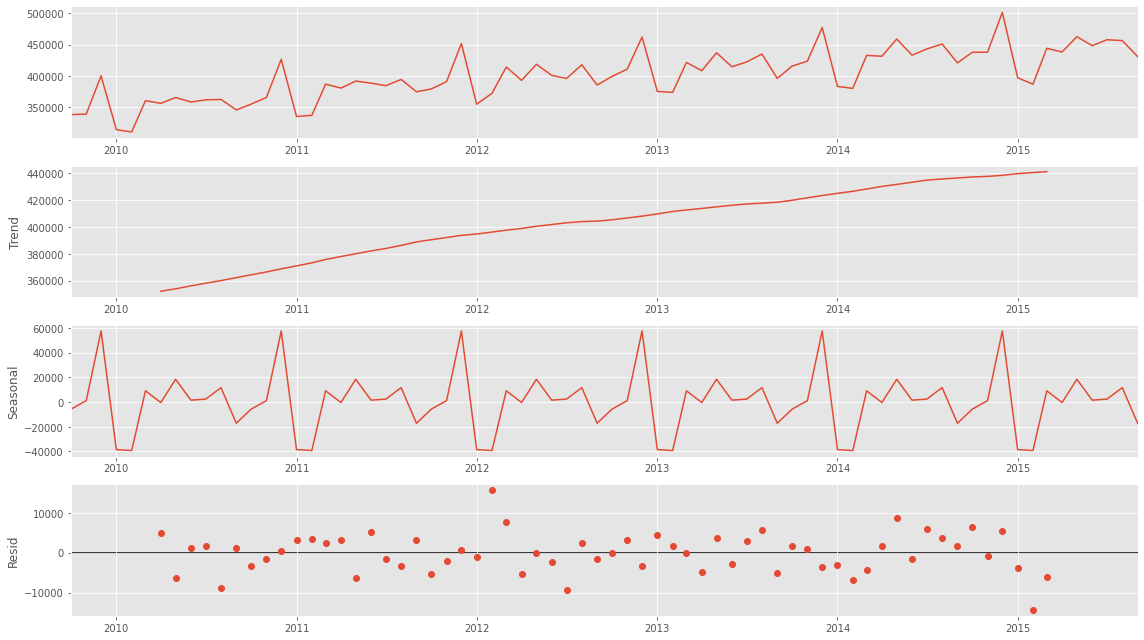

In [ ]:
# Stationary model
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(rs_df.asfreq('MS'), model='additive')
plot = decomposed.plot()
plot.set_size_inches((16, 9))
plot.tight_layout()
plt.show()

In [ ]:
rs_df['stationary'] = rs_df['sales'].diff() # Difference with element in previous row.

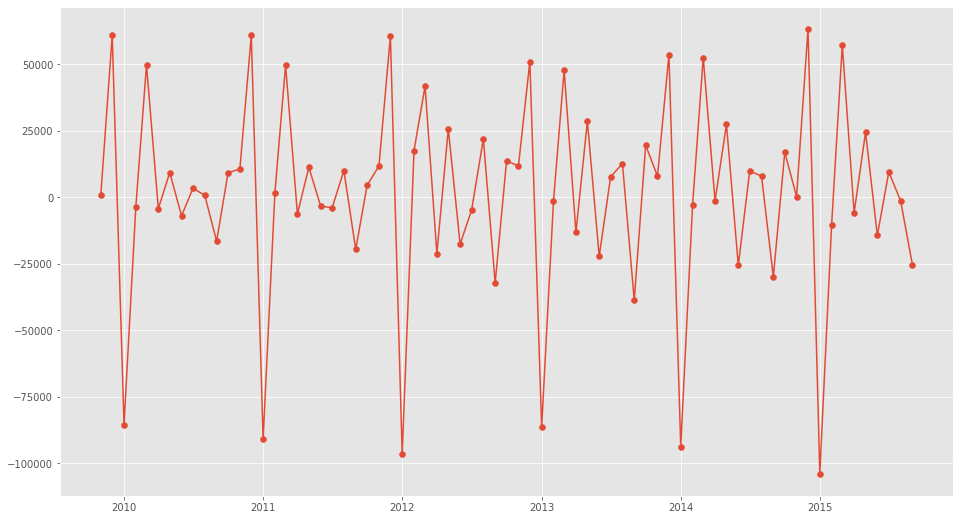

In [ ]:
plt.figure(figsize=(16,9))
plt.scatter(x=rs_df.index, y=rs_df['stationary'])
plt.plot(rs_df.index, rs_df['stationary'])
plt.show()

In [ ]:
# Since we got the difference, the first row would be problematic with null values. So we get rid of it.
rs_df = rs_df.iloc[1:, :]

In [ ]:
# Get rid of sales column
rs_df = rs_df.drop(columns='sales', axis=1)

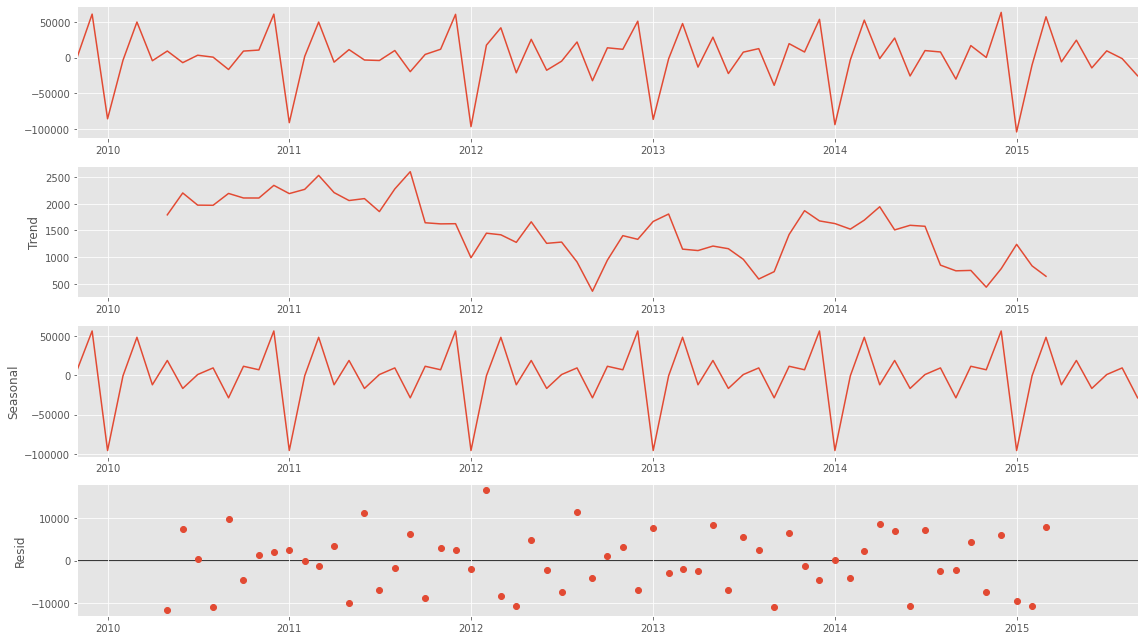

In [ ]:
# Check stationarity again
decomposed = seasonal_decompose(rs_df.asfreq('MS'), model='additive')
plot = decomposed.plot()
plot.set_size_inches((16, 9))
plot.tight_layout()
plt.show()

In [ ]:
# Statsmodels' inbuilt autoregression function
from statsmodels.tsa.ar_model import AR

In [ ]:
# Fit the model with our data
X = rs_df['stationary']
train_data = X[1:len(X)-12]
test_data = X[len(X)-12:]
model = AR(train_data)
model_fitted = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
/usr/lo

In [ ]:
model_fitted.params

const             7720.952626
L1.stationary       -1.297636
L2.stationary       -1.574980
L3.stationary       -1.403045
L4.stationary       -1.123204
L5.stationary       -0.472200
L6.stationary       -0.014586
L7.stationary        0.564099
L8.stationary        0.792080
L9.stationary        0.843242
L10.stationary       0.395546
dtype: float64

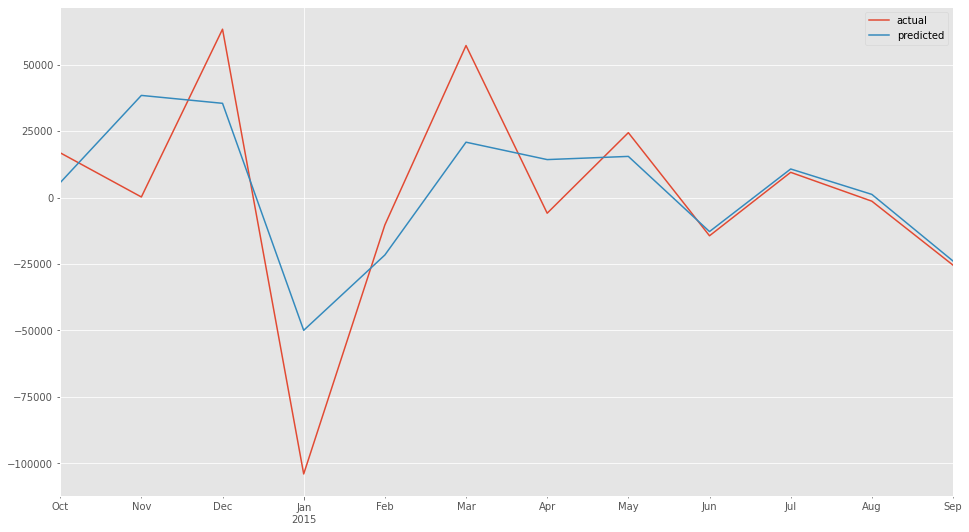

In [ ]:
# Comparing predictions with actual values
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)


compare_df = pd.concat(
    [rs_df['stationary'].tail(12),
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})
compare_df.plot(figsize=(16,9))

# Moving Averages

Source: https://github.com/jbrownlee/Datasets

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

--2022-09-17 11:37:31--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘daily-min-temperatures.csv’

daily-min-temperatu 100%[===================>]  66.33K  --.-KB/s    in 0.001s  

2022-09-17 11:37:31 (43.3 MB/s) - ‘daily-min-temperatures.csv’ saved [67921/67921]



In [ ]:
temps = pd.read_csv("daily-min-temperatures.csv")

In [ ]:
temps.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [ ]:
print(temps.shape)

(3650, 2)


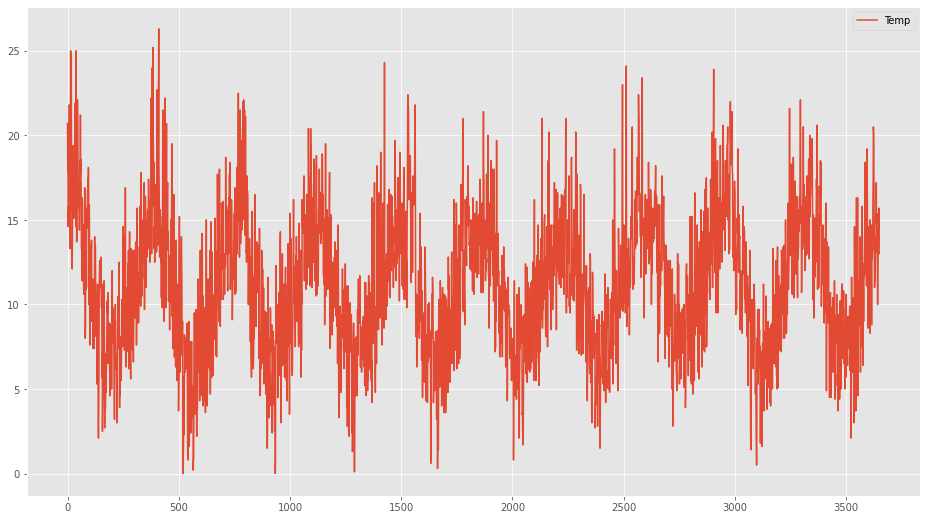

In [ ]:
temps.plot(figsize=(16,9))

# Simple Average
$$\bar x = \frac{\sum X}{N}$$

Just getting all the data and averaging it

In [ ]:
c = temps.mean()['Temp']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
avg = 0
for i in range(len(temps)):
  avg += temps.iloc[i]['Temp']
avg /= len(temps)
print(avg)

11.177753424657539


In [ ]:
temps.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


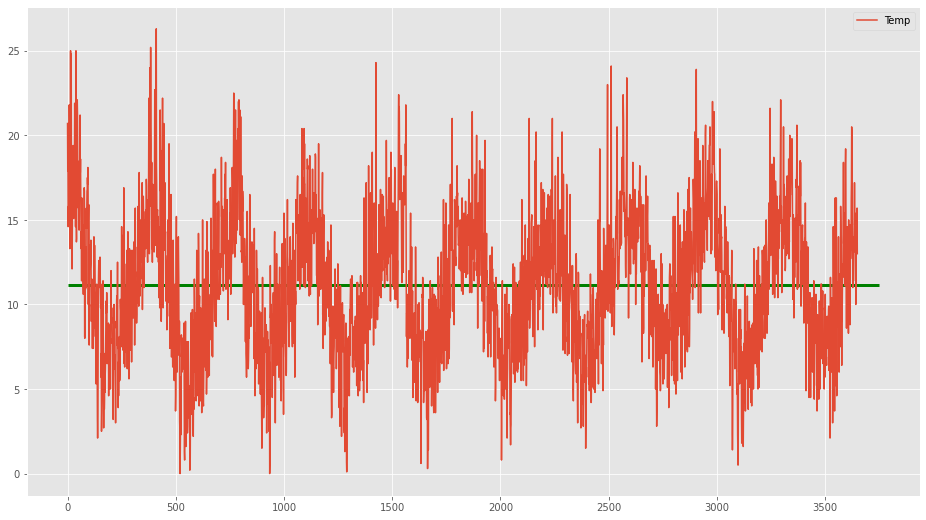

In [ ]:
ax = temps.plot(figsize=(16,9))
ax.hlines(y=c, xmin=0, xmax=3750, linewidth=3, color='g')

# Moving Average
$$F_N=\frac{\sum_{k=t-N}^iX}{N}$$

Getting the average of data within a certain time frame from the datapoint we wish to predict.

In [ ]:
N = 10 # Play around with this value

In [ ]:
MA_N = 0

In [ ]:
temps_predicted = temps.copy(deep=True)

In [ ]:
temps_predicted.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [ ]:
# Get initial moving average
MA_N = temps_predicted.iloc[:N].mean()['Temp']
temps_predicted['Temp'][N - 1] = MA_N 

for i in range(N, len(temps_predicted)):
  MA_N += temps.iloc[i]['Temp'] / N
  MA_N -= temps.iloc[i - N]['Temp'] / N
  temps_predicted['Temp'][i] = MA_N

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
temps_predicted[500:510]

,Date,Temp
500,1982-05-16,7.98
501,1982-05-17,7.63
502,1982-05-18,8.10
503,1982-05-19,9.07
504,1982-05-20,9.07
505,1982-05-21,9.04
506,1982-05-22,8.56
507,1982-05-23,8.27
508,1982-05-24,8.22
509,1982-05-25,8.96


In [ ]:
temps[500:510]

,Date,Temp
500,1982-05-16,4.6
501,1982-05-17,6.6
502,1982-05-18,13.2
503,1982-05-19,15.2
504,1982-05-20,7.6
505,1982-05-21,8.4
506,1982-05-22,6.0
507,1982-05-23,8.3
508,1982-05-24,8.6
509,1982-05-25,11.1


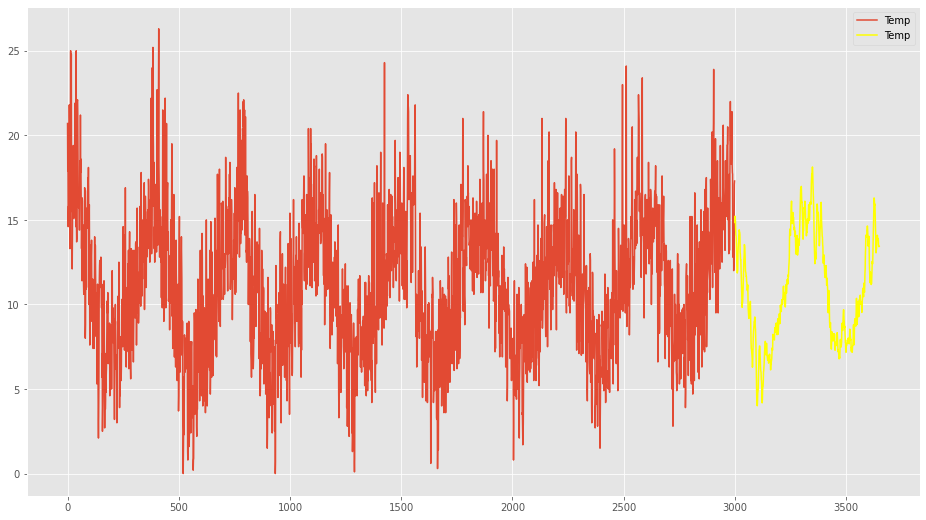

In [ ]:
# Plot up to 3000 with actual values, then the rest with SMA values
ax = temps[:3000].plot(figsize=(16,9))
temps_predicted[3000:].plot(ax=ax, color="yellow")

In [ ]:
# Get the rolling mean (moving average)
temps['SMA'] = temps['Temp'].rolling(10, min_periods=1).mean() 

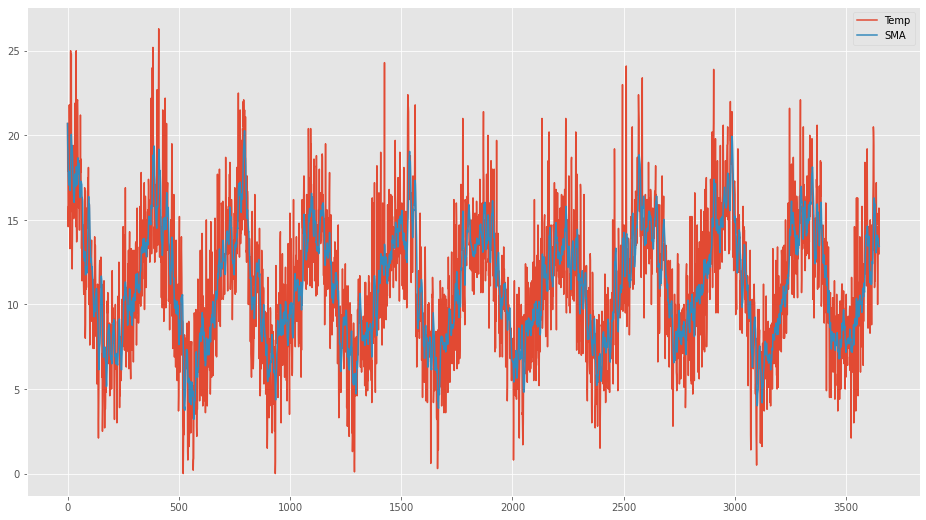

In [ ]:
temps.plot(figsize=(16, 9))

In [ ]:
temps[:20]

,Date,Temp,SMA
0,1981-01-01,20.7,20.700000
1,1981-01-02,17.9,19.300000
2,1981-01-03,18.8,19.133333
3,1981-01-04,14.6,18.000000
4,1981-01-05,15.8,17.560000
5,1981-01-06,15.8,17.266667
6,1981-01-07,15.8,17.057143
7,1981-01-08,17.4,17.100000
8,1981-01-09,21.8,17.622222
9,1981-01-10,20.0,17.860000


In [ ]:
temps_predicted[:20]

,Date,Temp
0,1981-01-01,20.70
1,1981-01-02,17.90
2,1981-01-03,18.80
3,1981-01-04,14.60
4,1981-01-05,15.80
5,1981-01-06,15.80
6,1981-01-07,15.80
7,1981-01-08,17.40
8,1981-01-09,21.80
9,1981-01-10,17.86


# Exponential Smoothing

$$F_t=F_{t-1}+\alpha(X_{t-1}-F_{t-1})$$

Using previously predicted and actual values to calculate

In [ ]:
temps.head()

,Date,Temp,SMA
0,1981-01-01,20.7,20.700000
1,1981-01-02,17.9,19.300000
2,1981-01-03,18.8,19.133333
3,1981-01-04,14.6,18.000000
4,1981-01-05,15.8,17.560000


In [ ]:
# Using the same dataset
temps.rename(columns={"SMA": "ES"}, inplace=True)

In [ ]:
temps["ES"][0] = temps["Temp"][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
alpha = 0.1 # Play around with this value, but the alpha must be between 0 and 1.

In [ ]:
# Converting the formula above into code
for i in range(1, len(temps)):
  temps["ES"][i] = temps["ES"][i-1] + alpha*(temps["Temp"][i-1] - temps["ES"][i-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


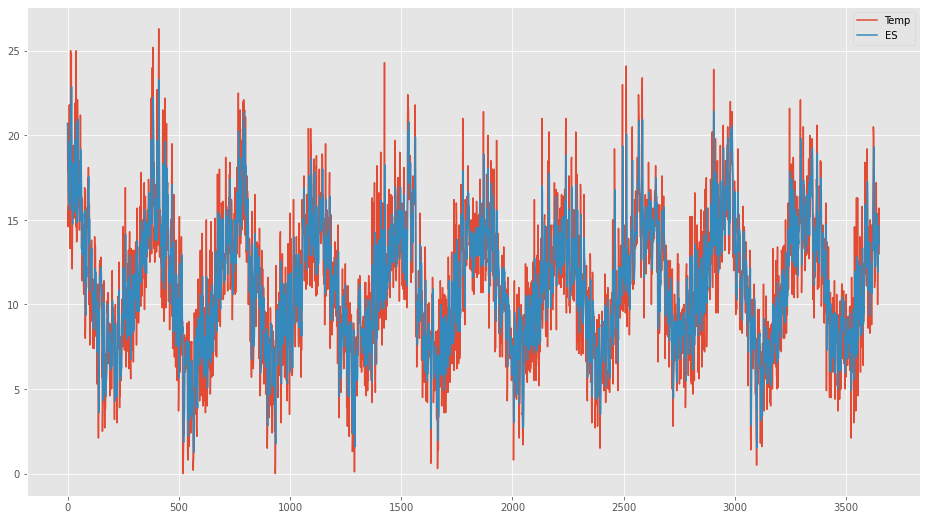

In [ ]:
temps.plot(figsize=(16, 9))

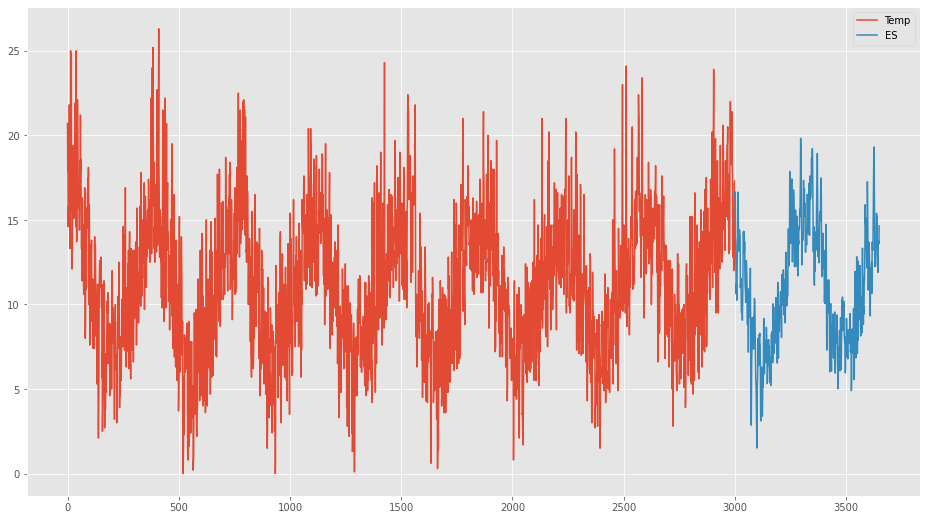

In [ ]:
plot = temps.drop(["ES"], axis=1)[:3000].plot()
temps.drop(["Temp"], axis=1)[3000:].plot(ax=plot, figsize=(16,9))

In [ ]:
# Using statsmodels' inbuild Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
temps = pd.read_csv("daily-min-temperatures.csv")

In [ ]:
# Using the model with the Temp column
model = SimpleExpSmoothing(np.asarray(temps['Temp']))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [ ]:
# Fitting the model
model_fit = model.fit(smoothing_level=alpha)

In [ ]:
smoothed = model_fit.fittedvalues

In [ ]:
print(smoothed.tolist())

[17.9133978881445, 18.19205809933005, 18.162852289397044, 18.226567060457338, 17.863910354411605, 17.657519318970444, 17.4717673870734, 17.30459064836606, 17.314131583529452, 17.76271842517651, 17.986446582658857, 17.807801924392972, 17.357021731953672, 17.291319558758303, 17.712187602882473, 18.440968842594224, 18.666871958334802, 18.860184762501323, 19.45416628625119, 19.278749657626072, 18.900874691863468, 18.83078722267712, 18.15770850040941, 17.78193765036847, 17.603743885331625, 17.49336949679846, 17.614032547118615, 17.792629292406755, 17.733366363166077, 17.51002972684947, 17.269026754164525, 17.082124078748073, 16.903911670873267, 17.09352050378594, 17.574168453407346, 17.806751608066612, 17.686076447259953, 17.59746880253396, 17.297721922280566, 17.27794973005251, 18.05015475704726, 17.745139281342535, 17.34062535320828, 16.996562817887455, 17.12690653609871, 17.61421588248884, 18.062794294239957, 18.376514864815963, 18.378863378334366, 18.20097704050093, 17.99087933645084, 1

In [ ]:
temps['ES'] = smoothed.tolist() 

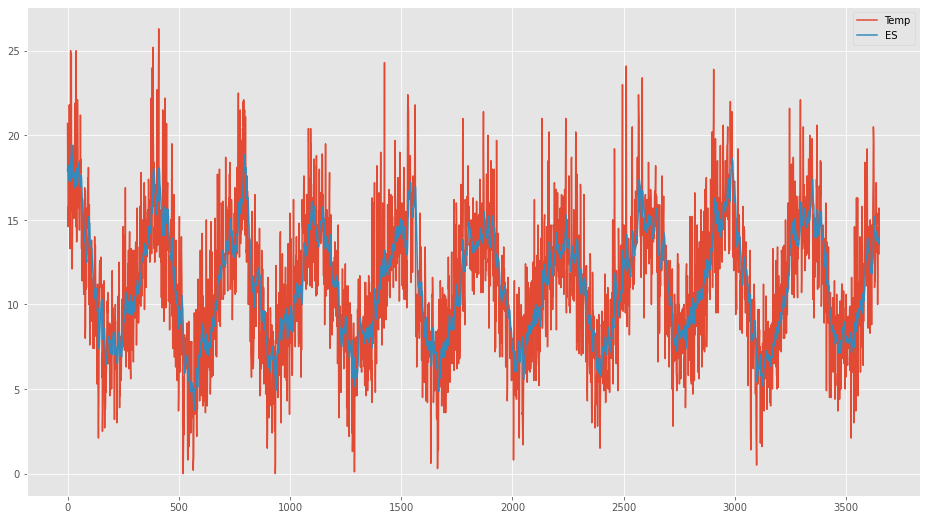

In [ ]:
temps.plot(figsize=(16,9))

## Checking accuracy

Mean Squared Error (MSE)
$$\frac{\sum(X-X_{\text{predicted}})^2}{N}$$

Alternatively, square root to get root mean squared error (RMSE)

In [ ]:
temps['Errorsquared'] = (temps['Temp'] - temps['ES']) ** 2

In [ ]:
MSE = temps['Errorsquared'].mean()

In [ ]:
MSE

7.304947534759721

# More complicated classical TSF methods

- Double, Triple Exponential Smoothing methods
- Autoregressive Integrated Moving Average Model (ARIMA), a combination of AR, I and MA methods

































# Time-series forecasting with ML

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

--2022-09-10 17:26:01--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘daily-min-temperatures.csv.1’

daily-min-temperatu 100%[===================>]  66.33K  --.-KB/s    in 0.01s   

2022-09-10 17:26:02 (5.40 MB/s) - ‘daily-min-temperatures.csv.1’ saved [67921/67921]



In [ ]:
temps = pd.read_csv("daily-min-temperatures.csv",index_col='Date',parse_dates=True)
temps.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


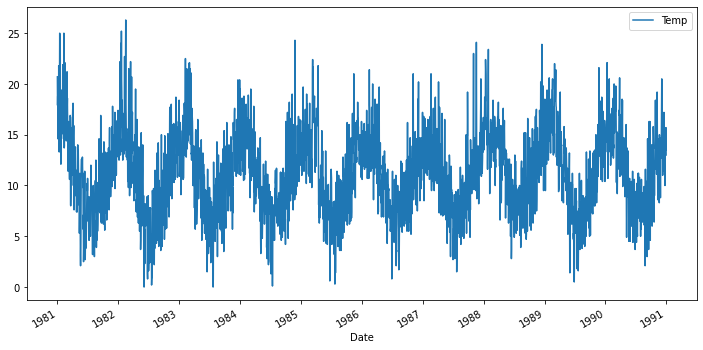

In [ ]:
temps.plot(figsize=(12,6))

In [ ]:
# Training Indexes
training_len = round(0.8 * len(temps))
train = temps[:training_len]
test = temps[training_len:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.78707224 0.68060837 0.7148289 ]
Predict this y: 
 [[0.55513308]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
# We do the same thing, but now instead for 365 days
n_input = 365
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
len(generator)

2555

# Creating the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
 150/2555 [>.............................] - ETA: 4:01 - loss: 0.0233

KeyboardInterrupt: ignored

# To save time

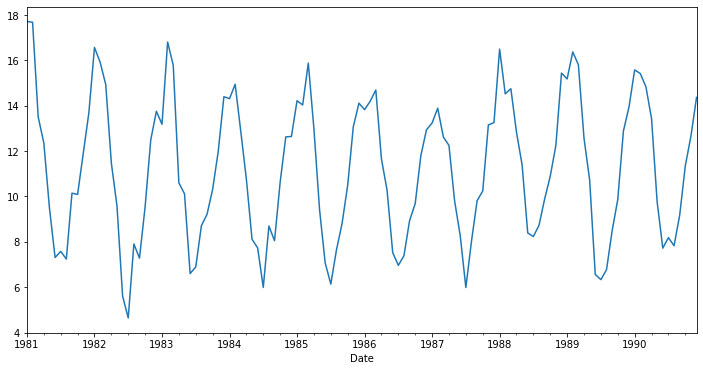

In [ ]:
temps.groupby(pd.PeriodIndex(temps.index, freq="M"))['Temp'].mean().plot(figsize=(12,6))

In [ ]:
temps = pd.DataFrame(temps.groupby(pd.PeriodIndex(temps.index, freq="M"))['Temp'].mean(), columns=["Temp"])
temps.head()

,Temp
Date,
1981-01,17.712903
1981-02,17.678571
1981-03,13.500000
1981-04,12.356667
1981-05,9.490323


In [ ]:
# Training Indexes
training_len = round(0.8 * len(temps))
train = temps[:training_len]
test = temps[training_len:]

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(generator,epochs=50)

Epoch 1/50
84/84 [==============================] - 2s 5ms/step - loss: 0.0773
Epoch 2/50
84/84 [==============================] - 1s 9ms/step - loss: 0.0437
Epoch 3/50
84/84 [==============================] - 0s 5ms/step - loss: 0.0324
Epoch 4/50
84/84 [==============================] - 0s 5ms/step - loss: 0.0312
Epoch 5/50
84/84 [==============================] - 0s 6ms/step - loss: 0.0129
Epoch 6/50
84/84 [==============================] - 0s 5ms/step - loss: 0.0109
Epoch 7/50
84/84 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 8/50
84/84 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 9/50
84/84 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 10/50
84/84 [==============================] - 0s 6ms/step - loss: 0.0108
Epoch 11/50
84/84 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 12/50
84/84 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 13/50
84/84 [==============================

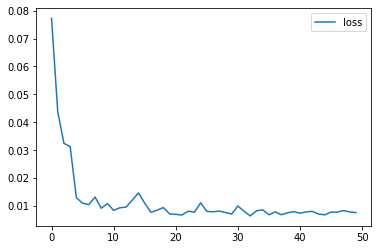

In [ ]:
pd.DataFrame(model.history.history).plot()

# Model predictions

In [ ]:
# Last 12 months of the train data
last_train_batch = scaled_train[-n_input:]

In [ ]:
# Reshaping the information to fit into our model
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
# Predicting the first month of test dataset
model.predict(last_train_batch)

array([[0.7851994]], dtype=float32)

In [ ]:
# Actual first month data of test dataset
scaled_test[0]

array([0.80626851])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


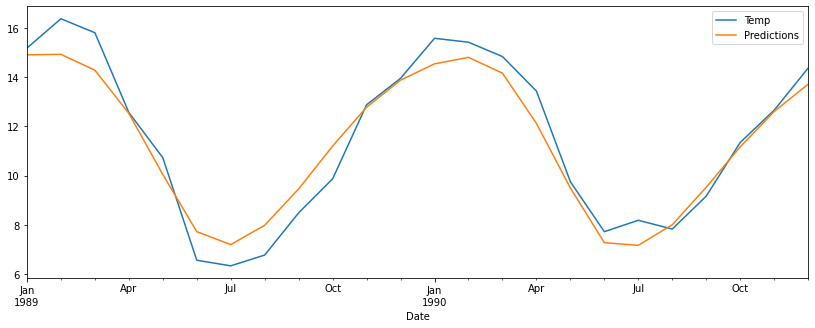

In [ ]:
test.plot(figsize=(14,5))

# Model evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
# RMSE
sqrt(mean_squared_error(test['Temp'],test['Predictions']))

0.8369691866120632

In [ ]:
# MAE
mean_absolute_error(test["Temp"], test["Predictions"])

0.6858845407947992

# RNN & GRU

In [ ]:
from tensorflow.keras.layers import GRU, SimpleRNN

In [ ]:
# define model
model = Sequential()
model.add(GRU(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(generator,epochs=50)

Epoch 1/50
84/84 [==============================] - 2s 7ms/step - loss: 0.0718
Epoch 2/50
84/84 [==============================] - 1s 7ms/step - loss: 0.0437
Epoch 3/50
84/84 [==============================] - 1s 7ms/step - loss: 0.0325
Epoch 4/50
84/84 [==============================] - 1s 7ms/step - loss: 0.0316
Epoch 5/50
84/84 [==============================] - 1s 7ms/step - loss: 0.0245
Epoch 6/50
84/84 [==============================] - 1s 8ms/step - loss: 0.0141
Epoch 7/50
84/84 [==============================] - 1s 9ms/step - loss: 0.0096
Epoch 8/50
84/84 [==============================] - 1s 12ms/step - loss: 0.0084
Epoch 9/50
84/84 [==============================] - 1s 13ms/step - loss: 0.0079
Epoch 10/50
84/84 [==============================] - 1s 12ms/step - loss: 0.0087
Epoch 11/50
84/84 [==============================] - 1s 7ms/step - loss: 0.0083
Epoch 12/50
84/84 [==============================] - 1s 7ms/step - loss: 0.0078
Epoch 13/50
84/84 [===========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


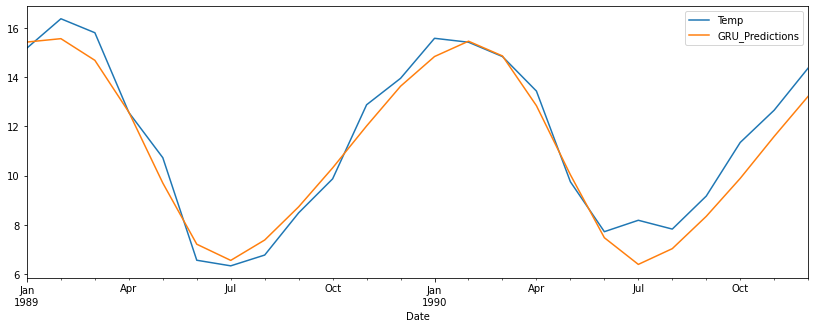

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

true_predictions = scaler.inverse_transform(test_predictions)
test['GRU_Predictions'] = true_predictions

test[["Temp", "GRU_Predictions"]].plot(figsize=(14,5))

In [ ]:
# define model
model = Sequential()
model.add(SimpleRNN(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(generator,epochs=50)

Epoch 1/50
84/84 [==============================] - 2s 8ms/step - loss: 0.0635
Epoch 2/50
84/84 [==============================] - 1s 7ms/step - loss: 0.0131
Epoch 3/50
84/84 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 4/50
84/84 [==============================] - 0s 4ms/step - loss: 0.0089
Epoch 5/50
84/84 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 6/50
84/84 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 7/50
84/84 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 8/50
84/84 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 9/50
84/84 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 10/50
84/84 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 11/50
84/84 [==============================] - 0s 4ms/step - loss: 0.0085
Epoch 12/50
84/84 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 13/50
84/84 [==============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


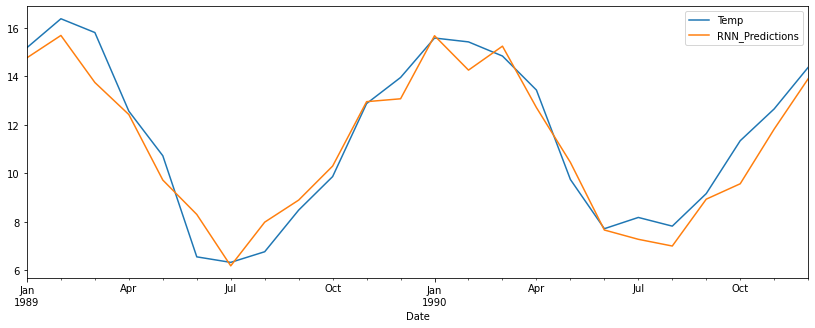

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

true_predictions = scaler.inverse_transform(test_predictions)
test['RNN_Predictions'] = true_predictions

test[["Temp", "RNN_Predictions"]].plot(figsize=(14,5))

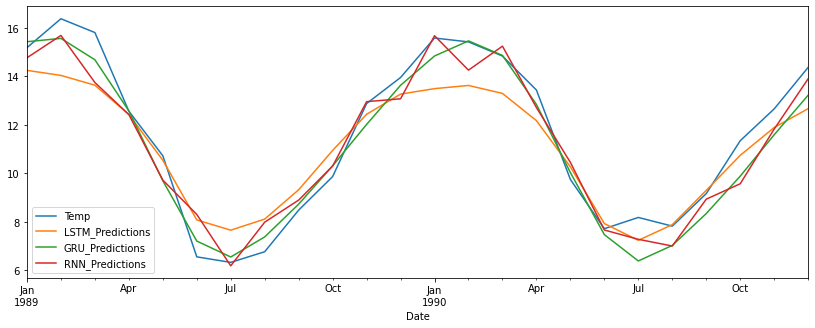

In [ ]:
test = test.rename(columns={"Predictions":"LSTM_Predictions"})
test.plot(figsize=(14,5))

In [ ]:
print(f"GRU RMSE: {sqrt(mean_squared_error(test['Temp'],test['GRU_Predictions']))}")
print(f"RNN RMSE: {sqrt(mean_squared_error(test['Temp'],test['RNN_Predictions']))}")

GRU RMSE: 0.7939279872688638
RNN RMSE: 0.9071087986174621


In [ ]:
print(f"GRU MAE: {mean_absolute_error(test['Temp'], test['GRU_Predictions'])}")
print(f"RNN MAE: {mean_absolute_error(test['Temp'], test['RNN_Predictions'])}")

GRU MAE: 0.6493597342746108
RNN MAE: 0.724494691137787
